In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
m = 100
CONVERGENCE_THRESHOLD = 1.1e-10

In [2]:
X = np.zeros(shape=(100,3))
f1 = open('./q3/logisticX.csv','r')
Y = np.zeros(shape = (100,1))
f2 = open('./q3/logisticY.csv','r')

cnt = 0
for x in f1:
    lt = x.split(',')
    X[cnt][0] = 1
    X[cnt][1] = lt[0]
    X[cnt][2] = lt[1]
    cnt += 1
cnt=0
for x in f2:
    Y[cnt][0] = int(x)

In [3]:
def sigma(x):
    return 1/(1+math.exp(-1*x))

In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    x_vals[1] = 10
    y_vals = intercept + slope * x_vals
#     print(x_vals)
#     print(y_vals)
    plt.plot(X[:50,1], X[:50,2], "or", marker = '^', label = '0')
    plt.plot(X[50:,1], X[50:,2], "ob", marker = 'o', label = '1')
    plt.legend()
    plt.plot(x_vals, y_vals)
#     plt.savefig('./images/q3.png')

In [5]:
theta = np.zeros(shape = (3,1))
S = np.zeros(shape = (m,m))
first_derivative = np.zeros(shape = (3,1))
pi = np.dot(X, theta)

prev_theta = np.ones(shape = (3,1))
cnt = 0
while(True):
    pi = np.dot(X, theta)
    for j in range(m):
        pi[j][0] = sigma(pi[j][0])
    
    for j in range(m):
        S[j][j] = pi[j][0] * (1-pi[j][0])
    first_derv = np.dot(X.T, np.subtract(pi, Y))
    H = np.dot(np.dot(X.T,S),X)
    H_inv = np.linalg.inv(H)
    delta = np.dot(H_inv, first_derv)
    prev_theta = theta
    theta = np.subtract(theta, delta)
    
    sum = 0
    for c in range(3):
        sum += abs(np.subtract(prev_theta,theta)[c])
    if(sum<CONVERGENCE_THRESHOLD):
        print(sum)
        print('Iteration: %s' % str(cnt))
        break
    cnt += 1
print("Final Parameters: ", theta)

[1.57651669e-14]
Iteration: 9
Final Parameters:  [[ 0.76311601]
 [-0.73164417]
 [-0.51600465]]


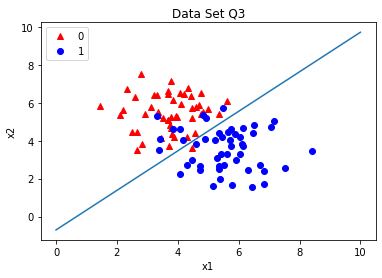

In [6]:
plt.title("Data Set Q3") 
plt.xlabel("x1") 
plt.ylabel("x2")
abline(-1*theta[0]/theta[1], -1*theta[2]/theta[1])